# RETAIL PRICE OPTIMIZATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
from matplotlib import colors

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

from datetime import datetime

## Get The Data

In [2]:
url = '/Users/yasemincingoz/Desktop/UCSC/Practice:Projects/PYTHON/Retail_Price/retail_price.csv'
df = pd.read_csv(url)

df.head(10)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


## Check The Data

In [3]:
df.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
for col in df.columns:
    missing_value = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_value))
    
#There is no missing values

product_id - 0.0%
product_category_name - 0.0%
month_year - 0.0%
qty - 0.0%
total_price - 0.0%
freight_price - 0.0%
unit_price - 0.0%
product_name_lenght - 0.0%
product_description_lenght - 0.0%
product_photos_qty - 0.0%
product_weight_g - 0.0%
product_score - 0.0%
customers - 0.0%
weekday - 0.0%
weekend - 0.0%
holiday - 0.0%
month - 0.0%
year - 0.0%
s - 0.0%
volume - 0.0%
comp_1 - 0.0%
ps1 - 0.0%
fp1 - 0.0%
comp_2 - 0.0%
ps2 - 0.0%
fp2 - 0.0%
comp_3 - 0.0%
ps3 - 0.0%
fp3 - 0.0%
lag_price - 0.0%


In [5]:
# Check if there is any duplicated values

df[df.duplicated(keep=False)]

#There is no duplicated values

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price


## Understand The Data

In [6]:
df.shape

#676 entries, 30 columns

(676, 30)

In [7]:
#Descriptive statistics of the data

df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [9]:
df.rename(columns={'qty':'quantity', 'month_year':'date', 's':'seasonality'}, inplace=True)
df.head(5)

,product_id,product_category_name,date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [10]:
# Drop unncessary column(s)

df = df.drop(['product_id'], axis=1)
df.head()

,product_category_name,date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [11]:
# Highest total price and product category

df.sort_values('total_price', ascending=False).head(10)

,product_category_name,date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,584,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,533,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,400,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,400,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,584,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,2600,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,533,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,363,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


In [12]:
# Minumum total price 

df.sort_values('total_price', ascending=True).head(10)

,product_category_name,date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
329,consoles_games,01-07-2017,1,19.90,11.85,19.90,56,237,3,100,...,19.900000,4.2,13.473077,19.900000,3.9,11.850000,19.900000,3.9,11.850000,19.850000
281,cool_stuff,01-09-2017,1,29.50,11.73,29.50,57,787,8,1867,...,99.990000,4.2,15.933333,29.500000,4.4,11.730000,29.500000,4.4,11.730000,29.450000
623,health_beauty,01-10-2017,1,29.90,11.85,29.90,55,388,1,250,...,23.990000,4.3,13.136667,89.990000,4.1,16.562917,58.990000,3.9,19.065263,29.850000
336,consoles_games,01-02-2018,1,32.50,11.85,32.50,56,237,3,100,...,32.500000,4.2,15.256000,32.500000,3.9,11.850000,32.500000,3.9,11.850000,27.033333
468,furniture_decor,01-08-2018,1,35.00,19.44,35.00,41,789,1,950,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
41,consoles_games,01-07-2018,1,36.20,22.18,36.20,49,100,4,150,...,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000
524,furniture_decor,01-07-2017,1,38.40,7.78,38.40,49,829,1,850,...,75.000000,4.1,15.856000,38.400000,3.7,7.780000,38.400000,3.7,7.780000,38.350000
457,furniture_decor,01-08-2017,1,38.40,11.85,38.40,41,789,1,950,...,75.000000,4.1,15.376923,38.400000,3.7,12.105000,38.400000,3.8,11.850000,38.350000
0,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39,161,2,350,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
75,health_beauty,01-08-2018,2,47.98,16.77,23.99,48,575,1,100,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,23.990000


# Explotary Data Analysis


In [13]:
# DISTRIBUTION OF NUMERIC VALUES

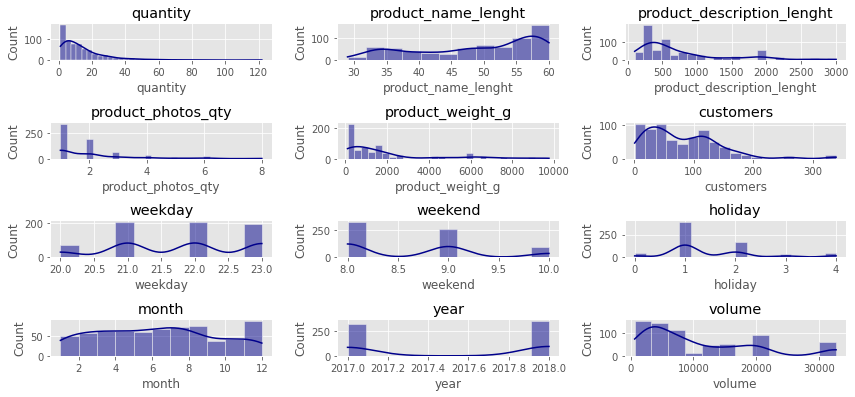

In [14]:
k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes('int'):
    plt.subplot(9,3,k)
    sns.histplot(df[i], kde=True, color='darkblue')
    plt.title(i)
    k+=1
   
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Distribution of Total Price')]

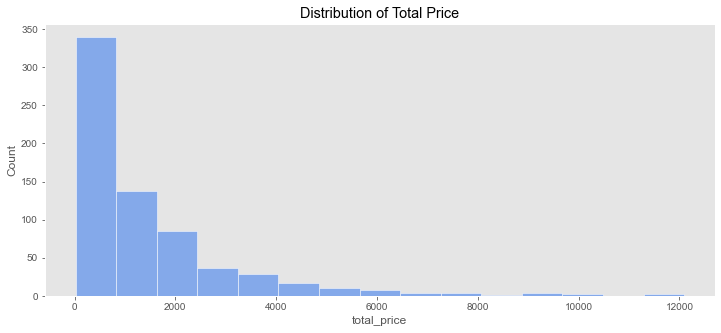

In [15]:
# DISTRIBUTION OF TOTAL PRICE

plt.figure(figsize=(12,5))
plt.grid(False)
sns.set_style('white')

sns.histplot(data=df, x='total_price', color='cornflowerblue',bins = 15).set(title = 'Distribution of Total Price')

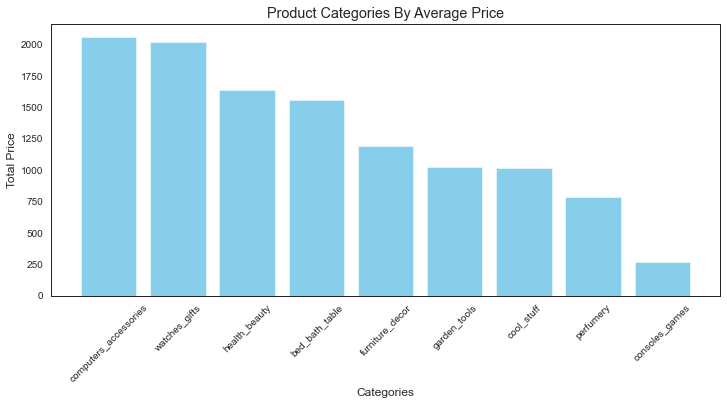

In [16]:
# AVERAGE TOTAL PRICE BY PRODUCT CATEGORIES

df1 = df.groupby(['product_category_name'])['total_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(df1.index, df1.values, color='skyblue')

plt.grid(False)
plt.title('Product Categories By Average Price')
plt.xlabel('Categories')
plt.ylabel('Total Price')
plt.xticks(rotation=45)

plt.show()

In [46]:
# RELATIONSHIP BETWEEN QUANTITY AND TOTAL PRICE

fig = px.scatter(df, 
                 x='quantity', 
                 y='total_price',
                 title='Quantity vs Total Price', trendline="ols", trendline_color_override="red")
fig.show()

In [47]:
# DISTRIBUTION OF UNIT PRICE

fig = px.box(df, y='unit_price', title='Distribution of Unit Price')

# Update box color
box_color = 'lightblue'
fig.update_traces(marker=dict(color=box_color, outliercolor=box_color), selector=dict(type='box'))

# Update layout to remove grid lines
#fig.update_layout(yaxis=dict(showgrid=False), xaxis=dict(showgrid=False))

fig.update_layout(yaxis_title='Unit Price')

fig.show()

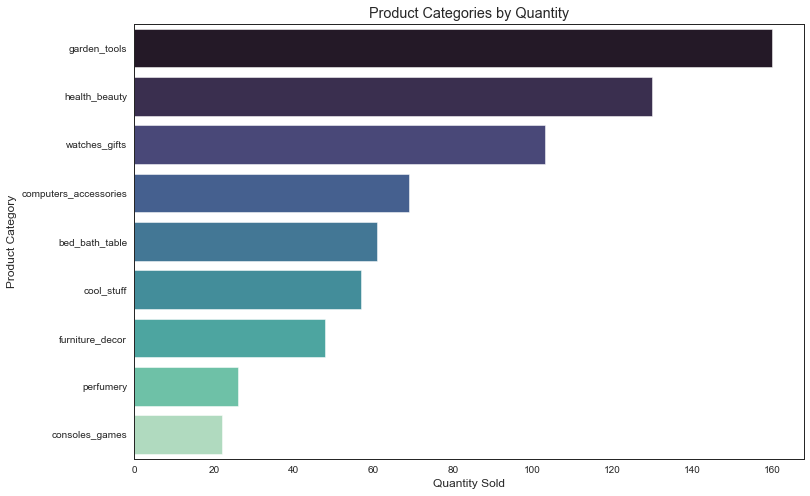

In [56]:
# PRODUCT CATEGORIES BY QUANTITY

plt.figure(figsize=(12, 8))

df1 = df.groupby(['product_category_name'])['quantity'].count().sort_values(ascending=False)
category_colors = sns.color_palette("mako", len(df1))

# Create a horizontal bar plot using Seaborn
sns.barplot(x=df1.values, y=df1.index, palette=category_colors)

sns.set_palette("BuPu")
plt.title('Product Categories by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.xticks(rotation=0)  

plt.show()

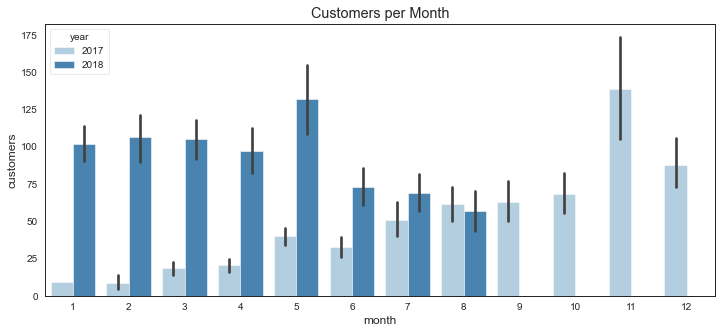

In [58]:
# CUSTOMERS PER MONTH BY YEARS

plt.figure(figsize=(12,5))

sns.barplot(data=df, x='month', y='customers', hue='year', palette='Blues').set(title = 'Customers per Month')
plt.grid(False)
sns.set_style('white')

## TIME SERIES ANALYSIS

In [60]:
# TOTAL PRICE BY WEEKDAY

# weekday = number of weekdays in that month

fig = px.box(df, x='weekday', y='total_price', title='Total Price by Weekday')

box_color = 'teal'
fig.update_traces(marker=dict(color=box_color, outliercolor=box_color), selector=dict(type='box'))
fig.update_layout(xaxis_title='Weekday', yaxis_title='Total Price')
fig.show()

In [59]:
fig = px.violin(df, x='weekday', y='total_price', title='Average Total Price by Weekday', color='weekday',
               color_discrete_sequence=["lightgreen", "teal", "lightblue", "darkblue"])
fig.update_layout(xaxis_title='Weekday', yaxis_title='Average Total Price')
fig.show()

In [23]:
# TOTAL PRICE BY HOLIDAY

# holiday=number of holidays in that month

fig = px.box(df, x='holiday', y='total_price', title='Total Price By Holiday')

box_color = 'skyblue'
fig.update_traces(marker=dict(color=box_color, outliercolor=box_color), selector=dict(type='box'))
fig.update_layout(xaxis_title='Holiday', yaxis_title='Total Price')
fig.show()

In [24]:
# TOTAL PRICE BY WEEKEND

# weekend = number of weekend in that month

fig = px.box(df, x='weekend', y='total_price', title='Total Price By Weekend')

box_color = 'darkblue'
fig.update_traces(marker=dict(color=box_color, outliercolor=box_color), selector=dict(type='box'))
fig.update_layout(xaxis_title='Weekend', yaxis_title='Total Price')
fig.show()


In [61]:
# date dtype is object. It should be datetime

df['date']= pd.to_datetime(df['date'])

In [26]:
df['day'] = df['date'].dt.day
df.head()

,product_category_name,date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,6
2,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,7
3,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,8
4,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,9


Text(0, 0.5, 'Total Price')

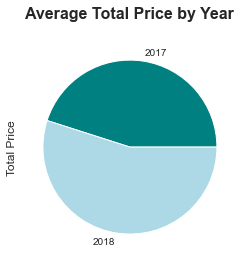

In [63]:
# Create a set of colors
colors=['teal', 'lightblue']
df.groupby(['year'])['total_price'].mean().plot.pie(wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

# Set the title for the pie plot and adjust the layout
plt.title('Average Total Price by Year', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Total Price')  

<Figure size 1440x720 with 0 Axes>

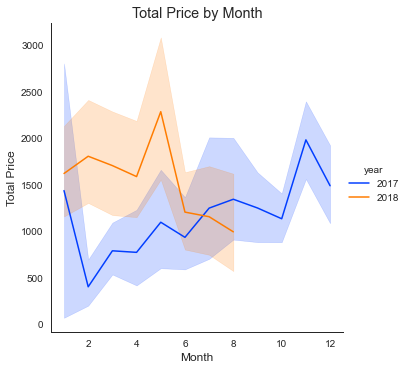

In [66]:
# TOTAL PRICE BY MONTH

plt.figure(figsize=(20,10))
sns.relplot(data=df, kind="line", x='month', y='total_price', hue='year', palette='bright')

plt.title("Total Price by Month")
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

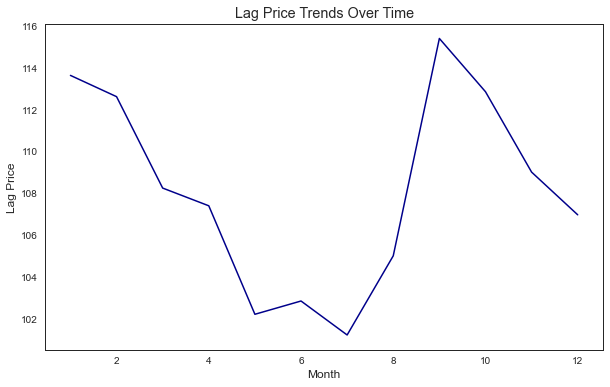

In [68]:
# LAG PRICE TRENDS

df1 = df.groupby(['month'])['lag_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df1['month'], df1['lag_price'], color='darkblue', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Lag Price')
plt.title('Lag Price Trends Over Time')

plt.grid(False)
plt.show()

## Comparison with Competitors

#### Product Price

In [35]:
#Analyzing competitors’ pricing strategies is essential in optimizing retail prices. 
#Monitoring and benchmarking against competitors’ prices can help identify opportunities to price competitively, 
#either by pricing below or above the competition, depending on the retailer’s positioning and strategy. 
#The average competitor price difference by product category(COMPETITOR_1)

df['comp1_price_diff'] = df['unit_price'] - df['comp_1']

fig = px.bar(df, 
             x='product_category_name', 
             y='comp1_price_diff', 
             title='Competitor Price Difference by Product Category',
             color='product_category_name',
             hover_name="product_category_name", color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Competitor1 Price Difference')
fig.show()

In [36]:
df['comp2_price_diff'] = df['unit_price'] - df['comp_2']
#avg_pricediff_by_category = df.groupby('product_category_name')['comp2_price_diff'].mean().reset_index()

fig = px.bar(df, 
             x='product_category_name', 
             y='comp2_price_diff', 
             title='Competitor Price Difference by Product Category',
             color='product_category_name',
             hover_name="product_category_name", color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Competitor2 Price Difference')
fig.show()

In [37]:
df['comp3_price_diff'] = df['unit_price'] - df['comp_1']
#avg_pricediff_by_category = df.groupby('product_category_name')['comp3_price_diff'].mean().reset_index()

fig = px.bar(df, 
             x='product_category_name', 
             y='comp3_price_diff', 
             title='Competitor Price Difference by Product Category',
             color='product_category_name',
             hover_name="product_category_name", color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Competitor3 Price Difference')
fig.show()

#### Shipping Price

In [84]:
df['comp1_freight_diff'] = df['freight_price'] - df['fp1']
df['comp2_freight_diff'] = df['freight_price'] - df['fp2']
df['comp3_freight_diff'] = df['freight_price'] - df['fp3']

for i in range (1,4):
    comp = f"comp{i}_freight_diff"
    fig = px.bar(x=df['product_category_name'], y=df[comp],
                title = f"Competitor{i} Shipping Price Difference",
                labels = {
                        'x':'Product Category',
                        'y': f"Competitor{i} Shipping Price"
                }
    )
    fig.show()

## CORRELATION

In [70]:
# NUMERICAL COLUMNS

numerical_col = df.select_dtypes(exclude=['object']).columns
numerical_col

Index(['date', 'quantity', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 'seasonality',
       'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price', 'day', 'comp1_price_diff',
       'comp2_price_diff', 'comp3_price_diff', 'comp1_freight_diff',
       'comp2_freight_diff', 'comp3_freight_diff'],
      dtype='object')

In [71]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index(['product_category_name'], dtype='object')

<AxesSubplot:>

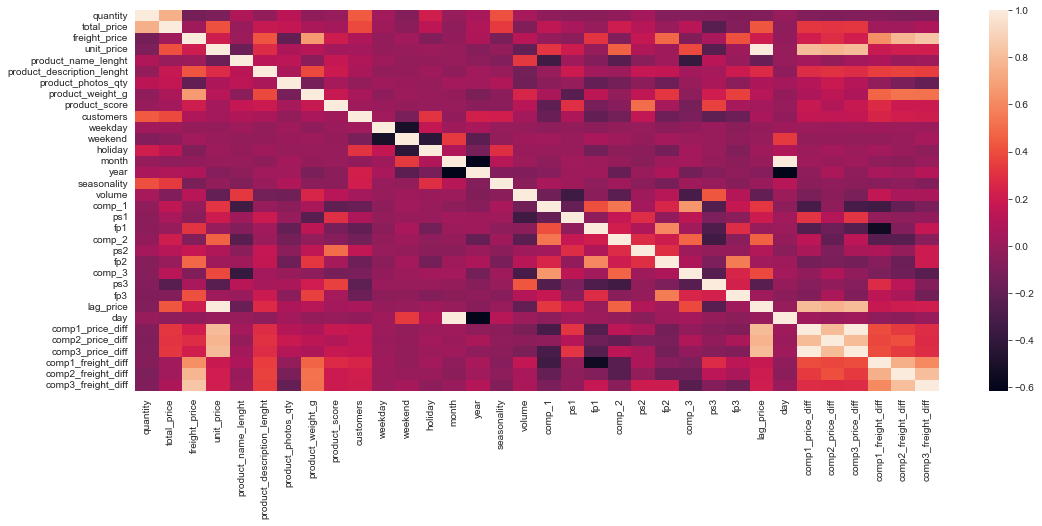

In [72]:
# Correlation heatmap of Numerical Features

plt.figure(figsize=(18,7))
sns.heatmap(df[numerical_col].corr())

In [73]:
df.corr()[['total_price']].sort_values(by='total_price', ascending=False)

,total_price
total_price,1.000000
quantity,0.749605
lag_price,0.426256
unit_price,0.409001
customers,0.386389
seasonality,0.334500
comp3_price_diff,0.318636
comp1_price_diff,0.318636
comp2_price_diff,0.306791
comp_2,0.203050


In [74]:
df.corr()[['lag_price']].sort_values(by='lag_price', ascending=False)

# There is high correlation between unit price and lag price.

,lag_price
lag_price,1.000000
unit_price,0.994453
comp3_price_diff,0.792894
comp1_price_diff,0.792894
comp2_price_diff,0.766378
comp_2,0.465271
total_price,0.426256
comp_3,0.385621
comp_1,0.322348
product_description_lenght,0.273883


## FEATURE ENGINEERING

In [39]:
# Feature Engineering is the cruical step in the process of preparing data for machine learning models.
# The goal of the feature engineering is to transform raw data into a format that can be better understood by the model,
# allowing it to make more accurate predictions or classifications.

### Linear Regression

In [40]:
# Liner Regression can be used to model the relationship between product prices and vaious factors affecting them.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
# split the data into training and test datasets

X = df[['quantity', 'unit_price', 'comp_1', 
          'product_score', 'comp1_price_diff']]
y = df['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create a model from the training dataset

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [44]:
# Validate the model with the test dataset. 
# The score() method passes the x_test and y_test variables of the test dataset to the model, which returns an R² value
# R² value that scores the model.

linearModel.score(X_test, y_test)

# 0.82 indicates that about %82  of the change in the dependent variable can be attributed to the independent variable.
# But it doesn't tell you whether the model's predictions are accurate or whether the model meets the specific requirements 


0.8292887797420144

In [45]:
# Use the model to make predicitons

y_predicted = linearModel.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_predicted, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()